In [55]:
from seismic.monitor.dv import read_dv
corr_len = 2
std_model = 4e-4
freq0 = 0.5
dvs = read_dv(f'/home/pm/Documents_sync/PhD/StHelens/spatial/kalman/new_gap_handling_crosssingle_largemap_cl{corr_len}_stdm{std_model}/{freq0}-*/DV-*.npz')


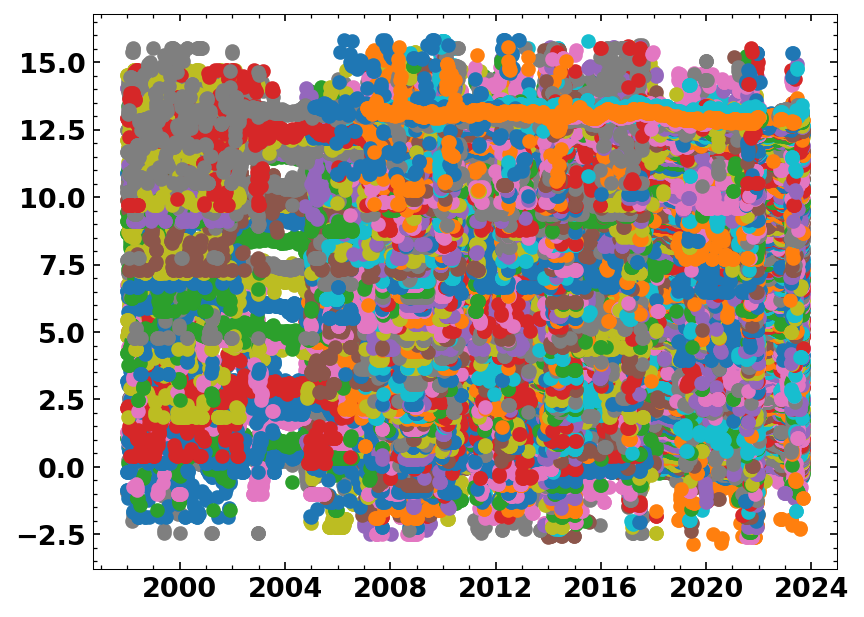

In [56]:
from matplotlib import pyplot as plt
for ii, dv in enumerate(dvs):
    times = [tt.datetime for tt in dv.stats.corr_start]
    plt.scatter(times, dv.value*100+ii*1e-2)

In [57]:
import numpy as np
for ii, dv in enumerate(dvs):
#     # dv.plot(style='publication')
#     # plt.title(dv.dv_processing['aligned'])
#     # if dv.dv_processing['aligned']:
#     #     print(dv.dv_processing['aligned'])
#     #     dv.plot()
#     # print(dv.dv_processing['aligned'])
    if np.all(np.isnan(dv.value)):
        print(dv.stats.id)
#         print(dv.dv_processing['aligned'])
#         dv.plot()
#     if 'CC-UW' in dv.stats.network and 'EHZ' in dv.stats.channel:
#         print(dv.dv_processing['aligned'])
#         dv.plot()
#     # if dv.dv_processing['aligned'] == 0.:
#     #     print(dv.value[dv.avail][0])
#     #     dv.plot()
#     # if ii == 20:
#     #     break

0.0034495230171599175


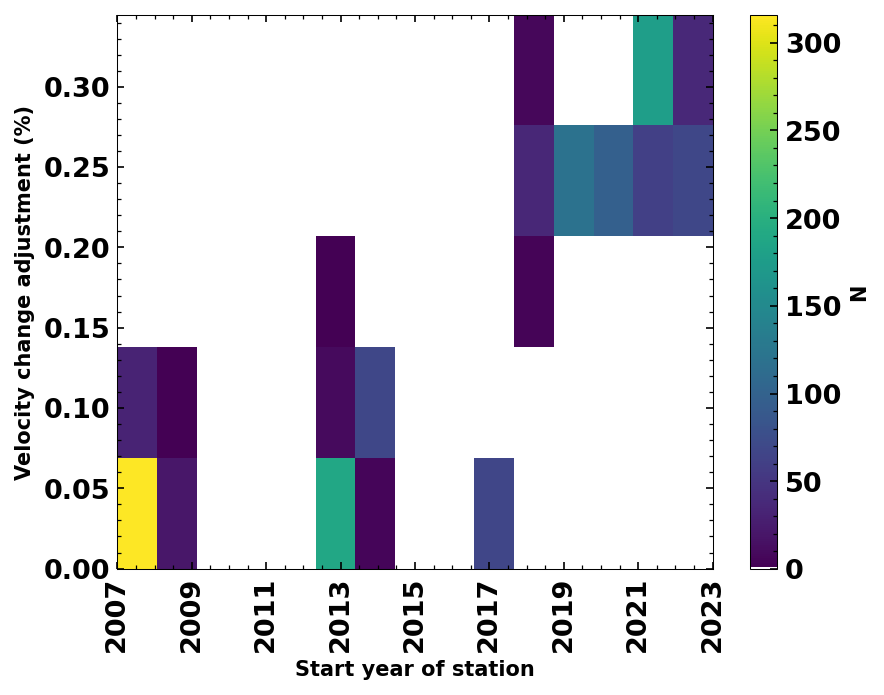

In [58]:
from seismic.plot.plot_utils import set_mpl_params
from matplotlib.colors import LinearSegmentedColormap

set_mpl_params()

shifts = np.array([dv.dv_processing['aligned'] for dv in dvs if dv.dv_processing['aligned'] is not False]);
# first start time of the station
start_year = np.array(
    [np.array(dv.stats.corr_start)[dv.avail].min().datetime.year for dv in dvs if dv.dv_processing['aligned'] is not False])
start_year[start_year<2007] = 2007

# colour the histogram bar by the start time of the station
# assign colours to start year
from matplotlib import cm
# first_start = [np.array(dv.stats.corr_start)[dv.avail].min() for dv in dvs]
# make a colormap on that 0 is very distinct
cmap = plt.get_cmap('viridis')

# Create a colormap with white at 0 and the chosen colormap for other values
colors = [(1, 1, 1), *cmap(np.linspace(0, 1, cmap.N))]
cmap = LinearSegmentedColormap.from_list('custom_colormap', colors, cmap.N)


plt.figure()
#plt.scatter(start_year, shifts*-100, c=start_year, cmap=cmap)
# plot 3d histogram
plt.hist2d(start_year, shifts*-100, bins=(15, 5), cmap=cmap)
plt.ylabel('Velocity change adjustment (%)')
plt.xlabel('Start year of station')
plt.colorbar(label="N")
# rotate xticklabels by 90 deg
plt.xticks(rotation=90)
plt.xticks(np.arange(2007, 2025, 2))
print(max(abs(shifts)))